In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
#import plotly.offline as py
#import plotly.graph_objects as go
#from plotly.offline import init_notebook_mode, iplot
#from plotly import tools
#init_notebook_mode(connected=True)
#import plotly.figure_factory as ff
#import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(style="whitegrid")

plt.style.use('fivethirtyeight')

import warnings

In [22]:
df=pd.read_csv('genderClass.csv')

In [31]:
df

Favorite Color Favorite Music Genre Favorite Beverage Favorite Soft Drink  \
0            Cool                 Rock             Vodka          7UP/Sprite   
1         Neutral              Hip hop             Vodka     Coca Cola/Pepsi   
2            Warm                 Rock              Wine     Coca Cola/Pepsi   
3            Warm     Folk/Traditional           Whiskey               Fanta   
4            Cool                 Rock             Vodka     Coca Cola/Pepsi   
..            ...                  ...               ...                 ...   
61           Cool                 Rock             Vodka     Coca Cola/Pepsi   
62           Cool              Hip hop              Beer     Coca Cola/Pepsi   
63        Neutral              Hip hop     Doesn't drink               Fanta   
64           Cool                 Rock              Wine     Coca Cola/Pepsi   
65           Cool           Electronic              Beer     Coca Cola/Pepsi   

   Gender  
0       F  
1       F  
2       F  
3       F  
4       F  
..    ...  
61      M  
62      M  
63      M  
64      M  
65      M  

[66 rows x 5 columns]

In [25]:
df['Favorite Color'].value_counts()

Cool       37
Warm       22
Neutral     7
Name: Favorite Color, dtype: int64

In [26]:
df['Favorite Music Genre'].value_counts()

Rock                19
Pop                 17
Electronic           8
Hip hop              8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: Favorite Music Genre, dtype: int64

In [27]:
df['Favorite Beverage'].value_counts()

Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: Favorite Beverage, dtype: int64

In [28]:
df['Favorite Soft Drink'].value_counts()

Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: Favorite Soft Drink, dtype: int64

In [29]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

Class 0: 33
Class 1: 33
Proportion: 1.0 : 1


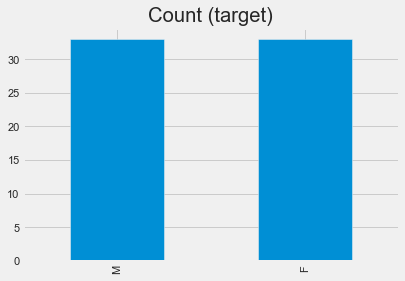

In [30]:
target_count = df['Gender'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.head()

Favorite Color Favorite Music Genre Favorite Beverage Favorite Soft Drink  \
0           Cool                 Rock             Vodka          7UP/Sprite   
1        Neutral              Hip hop             Vodka     Coca Cola/Pepsi   
2           Warm                 Rock              Wine     Coca Cola/Pepsi   
3           Warm     Folk/Traditional           Whiskey               Fanta   
4           Cool                 Rock             Vodka     Coca Cola/Pepsi   

   Gender  
0       0  
1       0  
2       0  
3       0  
4       0

In [11]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [12]:
year_feature=pd.get_dummies(df, columns=['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage','Favorite Soft Drink'])
year_feature.head()

Gender  Favorite Color_Cool  Favorite Color_Neutral  Favorite Color_Warm  \
0       0                    1                       0                    0   
1       0                    0                       1                    0   
2       0                    0                       0                    1   
3       0                    0                       0                    1   
4       0                    1                       0                    0   

   Favorite Music Genre_Electronic  Favorite Music Genre_Folk/Traditional  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      1   
4                                0                                      0   

   Favorite Music Genre_Hip hop  Favorite Music Genre_Jazz/Blues  \
0                             0                                0   
1                             1                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

   Favorite Music Genre_Pop  Favorite Music Genre_R&B and soul  ...  \
0                         0                                  0  ...   
1                         0                                  0  ...   
2                         0                                  0  ...   
3                         0                                  0  ...   
4                         0                                  0  ...   

   Favorite Beverage_Beer  Favorite Beverage_Doesn't drink  \
0                       0                                0   
1                       0                                0   
2                       0                                0   
3                       0                                0   
4                       0                                0   

   Favorite Beverage_Other  Favorite Beverage_Vodka  \
0                        0                        1   
1                        0                        1   
2                        0                        0   
3                        0                        0   
4                        0                        1   

   Favorite Beverage_Whiskey  Favorite Beverage_Wine  \
0                          0                       0   
1                          0                       0   
2                          0                       1   
3                          1                       0   
4                          0                       0   

   Favorite Soft Drink_7UP/Sprite  Favorite Soft Drink_Coca Cola/Pepsi  \
0                               1                                    0   
1                               0                                    1   
2                               0                                    1   
3                               0                                    0   
4                               0                                    1   

   Favorite Soft Drink_Fanta  Favorite Soft Drink_Other  
0                          0                          0  
1                          0                          0  
2                          0                          0  
3                          1                          0  
4                          0                          0  

[5 rows x 21 columns]

In [13]:
year_feature.columns

Index(['Gender', 'Favorite Color_Cool', 'Favorite Color_Neutral',
       'Favorite Color_Warm', 'Favorite Music Genre_Electronic',
       'Favorite Music Genre_Folk/Traditional', 'Favorite Music Genre_Hip hop',
       'Favorite Music Genre_Jazz/Blues', 'Favorite Music Genre_Pop',
       'Favorite Music Genre_R&B and soul', 'Favorite Music Genre_Rock',
       'Favorite Beverage_Beer', 'Favorite Beverage_Doesn't drink',
       'Favorite Beverage_Other', 'Favorite Beverage_Vodka',
       'Favorite Beverage_Whiskey', 'Favorite Beverage_Wine',
       'Favorite Soft Drink_7UP/Sprite', 'Favorite Soft Drink_Coca Cola/Pepsi',
       'Favorite Soft Drink_Fanta', 'Favorite Soft Drink_Other'],
      dtype='object')

In [14]:
X=year_feature.drop('Gender', axis=1)
y=year_feature['Gender']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)


In [17]:
model_lr=LogisticRegression()
model_lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

In [19]:
print("Accuracy Score Train:", metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy Score Test:", metrics.accuracy_score(y_test, y_pred_test))
print()
print("F1 Score:", metrics.f1_score(y_test, y_pred_test))
print("Precision Score:", metrics.precision_score(y_test, y_pred_test))
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred_test))

Accuracy Score Train: 0.6739130434782609
Accuracy Score Test: 0.8

F1 Score: 0.75
Precision Score: 0.8571428571428571
ROC-AUC Score: 0.7878787878787877


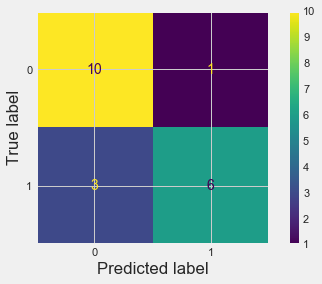

In [20]:
cfm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cfm,
                               display_labels = model_lr.classes_)
disp.plot()